In [50]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [81]:
# Our two datasets
df_vaccins = pd.read_csv("country_vaccinations.csv")
df_freedom = pd.read_csv("freedom.csv", sep=";")

In [82]:
vaccine_type = df_vaccins[['country', 'iso_code' , 'vaccines', 'total_vaccinations']]

In [83]:
vaccine_total = vaccine_type.groupby('vaccines')['total_vaccinations'].sum().reset_index()

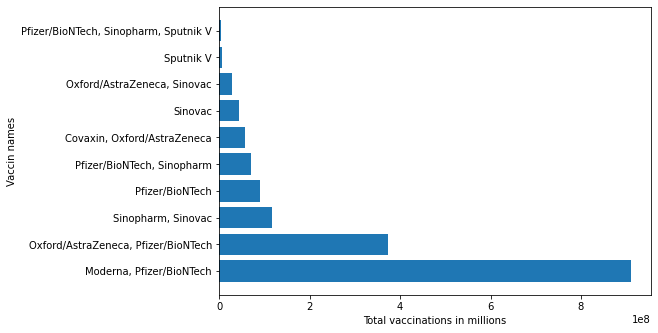

In [84]:
#Making the plot with the total vaccinations by vaccin supplier
vaccine_total_number = vaccine_total.sort_values('total_vaccinations', ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = vaccine_total_number.vaccines
students = vaccine_total_number.total_vaccinations
ax.barh(langs,students)
plt.xlabel('Total vaccinations in millions')
plt.ylabel('Vaccin names')
plt.show()

In [85]:
# The best total vaccins by country
best_total = df_vaccins.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
best_total.sort_values('total_vaccinations', ascending=False).head()

,country,iso_code,total_vaccinations
74,United States,USA,39037964.0
14,China,CHN,31200000.0
73,United Kingdom,GBR,11975267.0
33,India,IND,5775322.0
37,Israel,ISR,5441637.0


In [120]:
# Plotting the top 20 vaccinated countries by total
best_total = best_total.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(best_total, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total vaccinations Top 20 Country", height =500)
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [87]:
# The worst total vaccins by country
worst_total = df_vaccins.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
worst_total.sort_values('total_vaccinations', ascending=True).head(20)
worst_total = worst_total.sort_values('total_vaccinations', ascending=True).head(20)

In [119]:
# Plotting the worst 20 vaccinated countries by total
new_fig = px.bar(worst_total, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total vaccinations Worst 20 Country", height =500)
new_fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
new_fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
new_fig.show()

In [121]:
# Plotting the highest percentage of people vaccinated
total_vaccinated_percentage = df_vaccins.groupby(['country', 'iso_code'])['people_fully_vaccinated_per_hundred'].max().reset_index()
total_vaccinated_percentage.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(20)
total_vaccinated_percentage = total_vaccinated_percentage.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(20)

fig = px.bar(total_vaccinated_percentage, y='people_fully_vaccinated_per_hundred', x='country', color_discrete_sequence =['teal']*len(total_vaccinated_per), text='people_fully_vaccinated_per_hundred', title="percentage of people vaccinated", height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [90]:
df_freedom.head()

,Country,Region,C_T,Status,PR,CL,Total
0,Abkhazia,Eurasia,t,PF,17,23,40
1,Afghanistan,Asia,c,NF,13,14,27
2,Albania,Europe,c,PF,27,40,67
3,Algeria,MENA,c,NF,10,24,34
4,Andorra,Europe,c,F,39,55,94


In [91]:
# We are not taking territories into account, only countries
df_freedom = df_freedom[df_freedom.C_T != "t"]

In [92]:
# Now we don't need the C_T column anymore
df_freedom = df_freedom.drop('C_T', 1)

In [97]:
new_df = df_freedom.rename(columns={'Country':'country'})

In [99]:
print(new_df)

         country    Region Status  PR  CL  Total
1    Afghanistan      Asia     NF  13  14     27
2        Albania    Europe     PF  27  40     67
3        Algeria      MENA     NF  10  24     34
4        Andorra    Europe      F  39  55     94
5         Angola       SSA     NF  11  21     32
..           ...       ...    ...  ..  ..    ...
203    Venezuela  Americas     NF   2  14     16
204      Vietnam      Asia     NF   3  17     20
207        Yemen      MENA     NF   1  10     11
208       Zambia       SSA     PF  22  32     54
209     Zimbabwe       SSA     PF  12  17     29

[195 rows x 6 columns]


In [102]:
dfinal = new_df.merge(df_vaccins, on="country", how = 'inner')

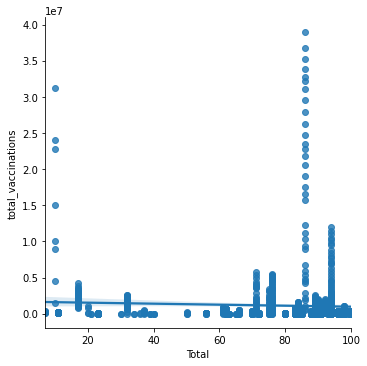

In [106]:
sns.lmplot(x='Total', y='total_vaccinations', data=dfinal)

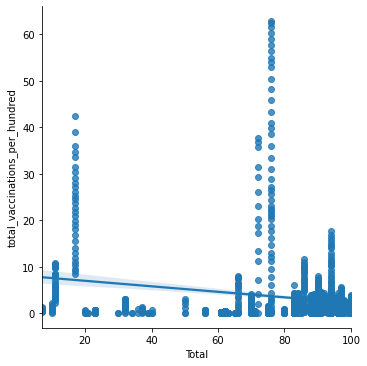

In [107]:
sns.lmplot(x='Total', y='total_vaccinations_per_hundred', data=dfinal)